In [1]:
import sys
sys.path.insert(0, "../azure-enterprise-scale-ml/esml/common/")
from esml import ESMLProject
import pandas as pd

p = ESMLProject() # Your project settings - knows Azure services, networking, lakedesign, identity mgmt, security, etc
p.inference_mode = False

p.active_model = 11
p.ws = p.get_workspace_from_config() #2) Load DEV or TEST or PROD Azure ML Studio workspace
p.connect_to_lake()

Using lake_settings.json with ESML version 1.4 - Models array support including LABEL
Using GEN2 as Datastore
Searching for setting in ESML datalake...
ESML in-folder settings override = TRUE 
 - Found settings in the ESML AutoLake  [active_in_folder.json,active_scoring_in_folder.json], to override ArgParse/GIT config with.
 - TRAIN in date:  1000/01/01
 - INFERENCE in date: 2021/06/08 and ModelVersion to score with: 1 (0=latest)


In [ ]:
from azureml.train import automl

# List of possible primary metrics is here:
# https://docs.microsoft.com/en-us/azure/machine-learning/how-to-configure-auto-train#primary-metric
    
# Get a list of valid metrics for your given task
automl.utilities.get_primary_metrics('classification')

# Dataset access

## IN 2 SILVER - ds01_diabetes

In [10]:
from azureml.core.dataset import Dataset

# IN 2 SILVER - ds01_diabetes
## IN-data (.csv):projects/project002/11_diabetes_model_reg/train/ds01_diabetes/in/dev/1000/01/01/*.csv
## OUT: Wrote prepped data to /mnt/azureml/cr/j/4d4ec72940434242863242e8615d1f06/cap/data-capability/wd/M11_ds01_diabetes_train_SILVER/silver.parquet

ds02 = Dataset.get_by_name(workspace=p.ws, name='M11_ds01_diabetes_train_SILVER',  version='latest')
ds02.to_pandas_dataframe().head()


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [14]:
input_path_parquet = 'projects/project002/11_diabetes_model_reg/train/ds01_diabetes/in/dev/1000/01/01/*.csv' # 1_latest, 1_latest/, 1_latest/*.parquet, 1_latest/gold.parquet
ds03 = Dataset.Tabular.from_delimited_files(path = [(p.datastore, input_path_parquet)])
ds03.to_pandas_dataframe().head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Dataset: TRAIN - SILVER MERGED 2 GOLD

In [29]:
from azureml.core.dataset import Dataset
# SILVER MERGED 2 GOLD

# IN-data: M11_GOLD
## projects/project002/11_diabetes_model_reg/train/ds01_diabetes/out/silver/dev/b6a52bcc-ec45-49e5-8d68-022a10d1a023/
##OUT: 
### Local Path from run.output_datasets[output_to_score_gold_name]: /mnt/azureml/cr/j/7387d4a5211a414a91fc07eb3e34f436/cap/data-capability/wd/M11_GOLD/gold.parquet
#### projects/project002/11_diabetes_model_reg/train/gold/dev/1_latest/gold.parquet

input_path_parquet = 'projects/project002/11_diabetes_model_reg/train/gold/dev/1_latest/' # 1_latest, 1_latest/, 1_latest/*.parquet, 1_latest/gold.parquet
aml_dataset_in = Dataset.Tabular.from_parquet_files(path = [(p.datastore, input_path_parquet)])
aml_dataset_in.to_pandas_dataframe().head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [34]:
# projects/project002/11_diabetes_model_reg/train/gold/dev/Train/8e9792b1f7e84d40b3dd29dbc5a91a37/*.parquet
p.path_gold_to_score_template(False,True,False) 

'projects/project002/11_diabetes_model_reg/train/gold/dev/{id_folder}/'

In [35]:
p.path_gold_to_score_template(False,False,False)

'projects/project002/11_diabetes_model_reg/train/gold/dev/'

In [30]:
aml_dataset_in

{
  "source": [
    "('project002prjsp', 'projects/project002/11_diabetes_model_reg/train/gold/dev/1_latest/')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ReadParquetFile",
    "DropColumns"
  ]
}

In [31]:
ds06 = Dataset.get_by_name(workspace=p.ws, name='M11_GOLD',  version='latest')
ds06.to_pandas_dataframe().head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [32]:
ds06

{
  "source": [
    "('project002prjsp', 'projects/project002/11_diabetes_model_reg/train/gold/dev/1_latest/')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ReadParquetFile",
    "DropColumns"
  ],
  "registration": {
    "id": "3401dbd3-d8ac-43e3-b6db-e7b62809f71a",
    "name": "M11_GOLD",
    "version": 32,
    "workspace": "Workspace.create(name='msft-weu-DEV-eap-proj02_ai-amls', subscription_id='ca0a8c40-b06a-4e4e-8434-63c03a1dee34', resource_group='MSFT-WEU-EAP_PROJECT02_AI-DEV-RG')"
  }
}

## Dataset: TRAIN - SPLIT and REGISTER datasets (train, test, validate)

In [18]:
from azureml.core.dataset import Dataset

input_path_parquet = 'projects/project002/11_diabetes_model_reg/train/gold/dev/1_latest/' # 1_latest, 1_latest/, 1_latest/*.parquet, 1_latest/gold.parquet
aml_dataset_in = Dataset.Tabular.from_parquet_files(path = [(p.datastore, input_path_parquet)])
aml_dataset_in.to_pandas_dataframe().head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [37]:
ds04 = Dataset.get_by_name(workspace=p.ws, name='M11_GOLD_TRAIN',  version='37') 
ds04.to_pandas_dataframe().head()
ds04
# M11_GOLD_TRAIN/gold_train.parquet

# M11_GOLD_TRAINgold_train.parquet '
##! Inget slash
##! Ett space efter ,parquet

{
  "source": [
    "('project002prjsp', 'projects/project002/11_diabetes_model_reg/train/gold/dev/Train/{id_folder}/')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ReadParquetFile",
    "DropColumns"
  ],
  "registration": {
    "id": "28b4571d-3b9b-499b-9d70-f5f491c0ed4e",
    "name": "M11_GOLD_TRAIN",
    "version": 37,
    "workspace": "Workspace.create(name='msft-weu-DEV-eap-proj02_ai-amls', subscription_id='ca0a8c40-b06a-4e4e-8434-63c03a1dee34', resource_group='MSFT-WEU-EAP_PROJECT02_AI-DEV-RG')"
  }
}

In [41]:
ds05 = Dataset.get_by_name(workspace=p.ws, name='M11_GOLD_TRAIN',  version='latest') 
#ds05.to_pandas_dataframe().head()
ds05

{
  "source": [
    "('project002prjsp', 'projects/project002/11_diabetes_model_reg/train/gold/dev/Train/{id_folder}/')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ReadParquetFile",
    "DropColumns"
  ],
  "registration": {
    "id": "28b4571d-3b9b-499b-9d70-f5f491c0ed4e",
    "name": "M11_GOLD_TRAIN",
    "version": 37,
    "workspace": "Workspace.create(name='msft-weu-DEV-eap-proj02_ai-amls', subscription_id='ca0a8c40-b06a-4e4e-8434-63c03a1dee34', resource_group='MSFT-WEU-EAP_PROJECT02_AI-DEV-RG')"
  }
}

In [42]:
ds05.to_pandas_dataframe().head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032433,-0.005220,219.0
1,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022512,-0.021788,70.0
2,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084495,-0.017646,202.0
3,0.096197,-0.044642,0.051996,0.079254,0.054845,0.036577,-0.076536,0.141322,0.098646,0.061054,230.0
4,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005145,-0.009362,111.0


In [47]:
#https://msftweudevcmnai2.blob.core.windows.net/lake3/projects/project002/11_diabetes_model_reg/train/active/gold_trained_runinfo
ds06 = Dataset.get_by_name(workspace=p.ws, name='M11_GOLD_TRAINED_RUNINFO',  version='latest') 

pd.set_option("max_colwidth", 500)
#pd.options.display.max_rows = 4000

ds06.to_pandas_dataframe()['training_data_used']

0    projects/project002/11_diabetes_model_reg/train/gold/dev/1000/01/01/bf94264b-7012-4370-ad71-6c2af3a2babf/
Name: training_data_used, dtype: object

In [49]:
ds07 = Dataset.get_by_name(workspace=p.ws, name='M11_GOLD_TRAIN',  version='latest') 
ds07.name

'M11_GOLD_TRAIN'

## `Autosplit` and register as Azure ML Datasets (avoid boring registering work, over and over, `since each project/model needs spliing dat for ML`)

In [ ]:
# GET TEST_SET - also tells us if we have a FITTED model or not...
label = p.active_model["label"]
try:
    p.GoldTest.name
    print("We HAVE connection to datalake already, AND have SPLITTED data, so probably we have TRAINED a model also. Now we can calculate scoring")
except: 
    print("Lest Connect to LAKE, and see IF we have splitted any data. If so we might have TRAINED a model also")
    p.connect_to_lake()
    try:
        p.GoldTest.name
        print("We have SPLITTED data, so probably we have also a FITTED MODEL. Now we can calucalte SCORING")
    except: 
        print("We did NOT have any DATASET's splitted and registered to calculate TEST_SET scoring,  lets split data, HOPE we have a registered FITTED/TRAINED MODEL..if not get_test_scoring_7_classification() will fail.")
        train_6, validate_set_2, test_set_2 = p.split_gold_3(0.6,label)
        print("Solution if fails: Train a model with ESML. e.g. run full notebook")

# Multiclass Classification: 2 ways of calculating METRICS. Example: `roc_auc_score`

### Alt A) Get best model via ESML, and `caluclate scoring metrics yourself` (over and over for each project)

In [ ]:
# GET BEST MODEL - accoring to YOU - settings\project_specific\model\model_settings.json
experiment, model,main_run, best_automl_run,fitted_model = p.get_best_model_and_run_via_experiment_name_and_ws(p.ws)

In [3]:
model

Model(workspace=Workspace.create(name='aml-prj002-weu-DEV-003', subscription_id='ca0a8c40-b06a-4e4e-8434-63c03a1dee34', resource_group='abc-def-esml-project002-weu-DEV-004-rg'), name=AutoMLa1a18ce4a0, id=AutoMLa1a18ce4a0:1, version=1, tags={'run_id': 'AutoML_a1a18ce4-aa15-4d90-befb-facdbbcc4e17', 'model_name': 'AutoMLa1a18ce4a0', 'trained_in_environment': 'dev', 'trained_in_workspace': 'aml-prj002-weu-DEV-003', 'experiment_name': '10_titanic_model_clas', 'test_set_ROC_AUC': '0.834775', 'test_set_Accuracy': '0.780899', 'test_set_F1_Score': '0.719424', 'test_set_Precision': '0.641838', 'test_set_Recall': '0.694444', 'test_set_Matthews_Correlation': '0.541023', 'test_set_CM': '[[89 17]\n [22 50]]'}, properties={})

In [10]:
# MANUALLY: Calculate TEST_SET roc_auc_score

from sklearn.metrics import roc_auc_score

X_test = p.GoldTest.to_pandas_dataframe()
y_test = X_test.pop(label).to_frame() # y_test (true labels)
y_predict = fitted_model.predict(X_test) # y_predict (predicted labels)
y_predict_proba = None

if fitted_model is not None and hasattr(fitted_model, 'predict_proba') and fitted_model.predict_proba is not None:
    y_predict_proba = fitted_model.predict_proba(X_test) 
    predict_proba = None
    predict_proba = y_predict_proba[:,1]

multi_class = False
if (multi_class):
    auc = roc_auc_score(y_true=y_test, y_score=y_predict_proba,multi_class='ovr') # ovo
else:
    auc = roc_auc_score(y_test, predict_proba)
    
print("roc_auc_score", auc)

print("And then...you need to log it (not showed here), such as regiser this in Azure ML Studio on model and test_set. ESML alternative does this auto, via TAGS")

roc_auc_score 0.8539046121593292
And then...you need to log it (not showed here), such as regiser this in Azure ML Studio on model and test_set. ESML alternative does this auto


# `TEST SET SCORING` (regression, binary or multi-class)

## To compare, to get best model via ESML - `auto-calucalulation of TEST-SET scoring` is done  (same consistent calulcation, for each project in your organisation)
- Supports both: `Binary` or `Multiclass` classficiaton

In [1]:
import sys
sys.path.insert(0, "../../azure-enterprise-scale-ml/esml/common/")
from esml import ESMLProject

p = ESMLProject() # Your project settings - knows Azure services, networking, lakedesign, identity mgmt, security, etc
p.ws = p.get_workspace_from_config() #2) Load DEV or TEST or PROD Azure ML Studio workspace
p.inference_mode = False

p.active_model = 10

Using lake_settings.json with ESML version 1.4 - Models array support including LABEL


If you run your code in unattended mode, i.e., where you can't give a user input, then we recommend to use ServicePrincipalAuthentication or MsiAuthentication.
Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk.


In [4]:
label = p.active_model["label"]
test_set_pd =  p.GoldTest.to_pandas_dataframe()
labels = test_set_pd[label].unique()
print(labels)

...
[0 1]


In [5]:
p.Gold.to_pandas_dataframe().head()

,Survived,Pclass,Name,Sex,Age,Siblings_Spouses Aboard,Parents_Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


found model via REMOTE FILTER: Experiment TAGS: model_name


Package:azureml-automl-runtime, training version:1.34.0, current version:1.26.0.post1
Package:azureml-core, training version:1.34.0, current version:1.26.0.post1
Package:azureml-dataprep, training version:2.22.2, current version:2.13.2
Package:azureml-dataprep-native, training version:38.0.0, current version:32.0.0
Package:azureml-dataprep-rslex, training version:1.20.2, current version:1.11.2
Package:azureml-dataset-runtime, training version:1.34.0, current version:1.26.0
Package:azureml-defaults, training version:1.34.0, current version:1.26.0
Package:azureml-interpret, training version:1.34.0, current version:1.26.0
Package:azureml-pipeline-core, training version:1.34.0, current version:1.26.0
Package:azureml-telemetry, training version:1.34.0, current version:1.26.0
Package:azureml-train-automl-client, training version:1.34.0, current version:1.26.0
Package:azureml-train-automl-runtime, training version:1.34.0, current version:1.26.0.post1
Package:azureml-mlflow, training version:1

...
...
...
...
...
...
...
...
...
Replacing tag run_id -> AutoML_7e3ddc93-d7a6-4989-87d2-b538e6a24281 with run_id -> AutoML_7e3ddc93-d7a6-4989-87d2-b538e6a24281
Replacing tag model_name -> AutoML7e3ddc93d7 with model_name -> AutoML7e3ddc93d7
Replacing tag trained_in_environment -> dev with trained_in_environment -> dev
Replacing tag trained_in_workspace -> msft-weu-DEV-eap-proj02_ai-amls with trained_in_workspace -> msft-weu-DEV-eap-proj02_ai-amls
Replacing tag experiment_name -> 10_titanic_model_clas with experiment_name -> 10_titanic_model_clas
Replacing tag test_set_ROC_AUC -> 0.858617 with test_set_ROC_AUC -> 0.858617
Replacing tag test_set_Accuracy -> 0.842697 with test_set_Accuracy -> 0.842697
Replacing tag test_set_F1_Score -> 0.810811 with test_set_F1_Score -> 0.810811
Replacing tag test_set_Precision -> 0.747782 with test_set_Precision -> 0.747782
Replacing tag test_set_Recall -> 0.789474 with test_set_Recall -> 0.789474
Replacing tag test_set_Matthews_Correlation -> 0.67708

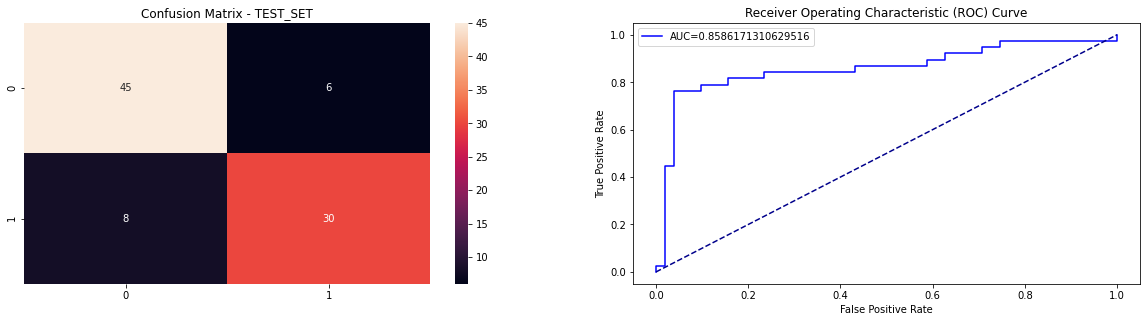

In [6]:
from baselayer_azure_ml import ESMLTestScoringFactory
auc,accuracy,f1, precision,recall,matrix,matthews, plt = ESMLTestScoringFactory(p).get_test_scoring_7_classification() # ovo,ovr,raise ...ovo is default

print("AUC:")
print(auc)
print()
print("Accuracy:")
print(accuracy)
print()
print("F1 Score:")
print(f1)
print()
print("Precision:")
print(precision)
print()
print("Recall:")
print(recall)
print()
print("Mathews correlation:")
print(matthews)
print()
print("Confusion Matrix:")
print(matrix)


In [7]:
p.active_model = 13 # CHANGE model - to a multi-classification model

label = p.active_model["label"]
print("label", label)
test_set_pd =  p.GoldTest.to_pandas_dataframe()
labels = test_set_pd[label].unique()
print(labels)

label Segmentation
...
[2 1 0 3]


found model via REMOTE FILTER: Experiment TAGS: model_name


Package:azureml-automl-runtime, training version:1.35.1, current version:1.26.0.post1
Package:azureml-core, training version:1.35.0.post1, current version:1.26.0.post1
Package:azureml-dataprep, training version:2.23.2, current version:2.13.2
Package:azureml-dataprep-native, training version:38.0.0, current version:32.0.0
Package:azureml-dataprep-rslex, training version:1.21.2, current version:1.11.2
Package:azureml-dataset-runtime, training version:1.35.0, current version:1.26.0
Package:azureml-defaults, training version:1.35.0, current version:1.26.0
Package:azureml-interpret, training version:1.35.0, current version:1.26.0
Package:azureml-pipeline-core, training version:1.35.0, current version:1.26.0
Package:azureml-telemetry, training version:1.35.0, current version:1.26.0
Package:azureml-train-automl-client, training version:1.35.0, current version:1.26.0
Package:azureml-train-automl-runtime, training version:1.35.1, current version:1.26.0.post1
Package:azureml-train-core, training

...
...
...
...
...
...
...
...
Replacing tag run_id -> AutoML_7885361a-4377-46ae-8c24-b0f5831c5ef5 with run_id -> AutoML_7885361a-4377-46ae-8c24-b0f5831c5ef5
Replacing tag model_name -> AutoML7885361a40 with model_name -> AutoML7885361a40
Replacing tag trained_in_environment -> dev with trained_in_environment -> dev
Replacing tag trained_in_workspace -> msft-weu-DEV-eap-proj02_ai-amls with trained_in_workspace -> msft-weu-DEV-eap-proj02_ai-amls
Replacing tag experiment_name -> 13_car_multiclass with experiment_name -> 13_car_multiclass
Replacing tag test_set_ROC_AUC -> multiclass classification - see multilabel_confusion_matrix instead with test_set_ROC_AUC -> multiclass classification - see multilabel_confusion_matrix instead
Replacing tag test_set_Accuracy -> 0.528273 with test_set_Accuracy -> 0.528273
Replacing tag test_set_F1_Score -> [0.664495, 0.459397, 0.393443, 0.550889] with test_set_F1_Score -> [0.664495, 0.459397, 0.393443, 0.550889]
Replacing tag test_set_Precision -> [0.6

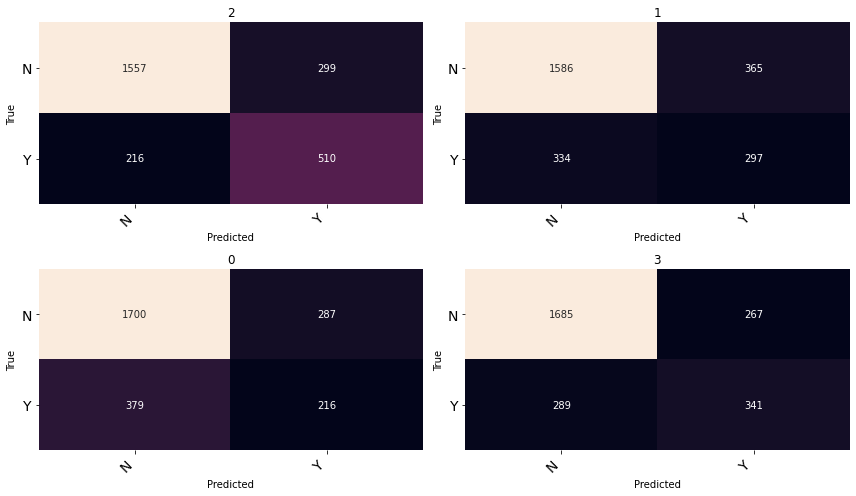

In [8]:
auc,accuracy,f1, precision,recall,matrix,matthews, plt = ESMLTestScoringFactory(p).get_test_scoring_7_classification() # ovo,ovr,raise ...ovo is default

print("AUC:")
print(auc)
print()
print("Accuracy:")
print(accuracy)
print()
print("F1 Score:")
print(f1)
print()
print("Precision:")
print(precision)
print()
print("Recall:")
print(recall)
print()
print("Mathews correlation:")
print(matthews)
print()
print("Confusion Matrix:")
print(matrix)


found model via REMOTE FILTER: Experiment TAGS: model_name


Package:azureml-automl-runtime, training version:1.34.0.post1, current version:1.26.0.post1
Package:azureml-core, training version:1.34.0, current version:1.26.0.post1
Package:azureml-dataprep, training version:2.22.2, current version:2.13.2
Package:azureml-dataprep-native, training version:38.0.0, current version:32.0.0
Package:azureml-dataprep-rslex, training version:1.20.2, current version:1.11.2
Package:azureml-dataset-runtime, training version:1.34.0, current version:1.26.0
Package:azureml-defaults, training version:1.34.0, current version:1.26.0
Package:azureml-interpret, training version:1.34.0, current version:1.26.0
Package:azureml-pipeline-core, training version:1.34.0, current version:1.26.0
Package:azureml-telemetry, training version:1.34.0, current version:1.26.0
Package:azureml-train-automl-client, training version:1.34.0, current version:1.26.0
Package:azureml-train-automl-runtime, training version:1.34.0.post1, current version:1.26.0.post1
Package:azureml-mlflow, traini

...
...
...
...
...
...
...
Replacing tag run_id -> AutoML_b608482b-eaf3-4398-b7f0-2b6001566e27 with run_id -> AutoML_b608482b-eaf3-4398-b7f0-2b6001566e27
Replacing tag model_name -> AutoMLb608482be0 with model_name -> AutoMLb608482be0
Replacing tag trained_in_environment -> dev with trained_in_environment -> dev
Replacing tag trained_in_workspace -> msft-weu-DEV-eap-proj02_ai-amls with trained_in_workspace -> msft-weu-DEV-eap-proj02_ai-amls
Replacing tag experiment_name -> 12_car_price_regression with experiment_name -> 12_car_price_regression
Replacing tag test_set_RMSE -> 2044.834458 with test_set_RMSE -> 2044.834458
Replacing tag test_set_R2 -> 0.933737 with test_set_R2 -> 0.933737
Replacing tag test_set_MAPE -> 0.061736 with test_set_MAPE -> 0.061736
Replacing tag test_set_Spearman_Correlation -> 0.966940 with test_set_Spearman_Correlation -> 0.966940
Model tag add operation complete.
RMSE:
2044.8344578877845

R2:
0.9337368851187741

MAPE:
0.061736253549726575

MAE:
1357.422907932

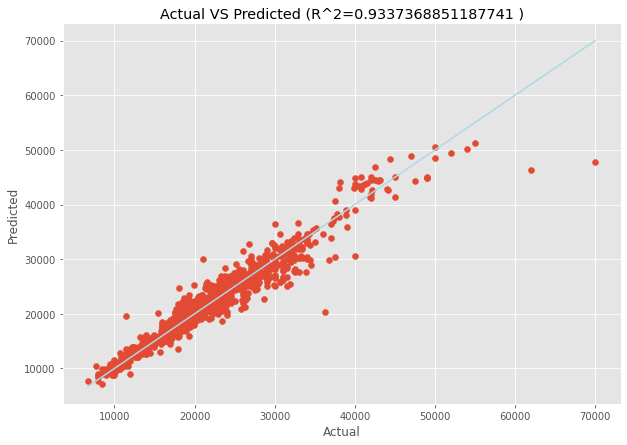

In [11]:
p.active_model = 12 # CHANGE model - to a multi-classification model

label = p.active_model["label"]
rmse, r2, mean_abs_percent_error,mae,spearman_corr,plt = ESMLTestScoringFactory(p).get_test_scoring_4_regression(label)
print("RMSE:")
print(rmse)
print()
print("R2:")
print(r2)
print()
print("MAPE:")
print(mean_abs_percent_error)
print()
print("MAE:")
print(mae)
print()
print("Spearman:")
print(spearman_corr)

# Connect to OTHER workspace stuff
# - DEV 2 TEST - comparison, BEST_MODEL version in other Workspace? 

In [ ]:
p.dev_test_prod = "test" # Swith to TEST environment from DEV
p.ws = p.get_workspace_from_config()
p.inference_mode = True
print("Azure ML workspace", p.ws.name)

In [ ]:
# Get latest model "manually" - can also be left out since DEFAULT behavour is to get latest
m = p.get_best_model_via_modeltags_only(p.ws,p.experiment_name, filter_on_version=None) 
latest_version_in_test = m.version
print("Latest BEST model registered: {}".format(latest_version_in_test))

# COMPUTE: Get default cluster (and name) in Azure ML, that BICEP created

In [4]:
from azureml.core.compute import ComputeTarget
name = p.get_default_training_aml_compute_name()
print("Default CPU cluster compute that BICEP created: ", name)
print("Default CPU cluster that BICEP created: ", p.compute_factory.aml_cluster_name)
print("Default AKS cluster that BICEP created: ", p.compute_factory.aks_name)


#aml_compute = ComputeTarget(workspace=ws, name=name)

Default CPU cluster compute that BICEP created:  p002-m10weu-dev
Default CPU cluster that BICEP created:  p002-m10weu-dev
Default AKS cluster that BICEP created:  esml-dev-prj002


# COMPUTE: Create NEW training cluster, with SUFFIX 
- ESML has a `create cLUSTER if name not exists` logic, hence after we change configuration, we need to either DELETE cluster first, or rename it at CREATION

In [ ]:
aml_compute = p.get_training_aml_compute(ws=p.ws, use_non_model_specific_cluster=False, create_cluster_with_suffix_char='2')

# ------ PIPELINES -----

# Create BATCH SCORING pipeline in OTHER Azure ML workspace

In [ ]:
from baselayer_azure_ml_pipeline import ESMLPipelineFactory, esml_pipeline_types
p.dev_test_prod = "test" # Swith to TEST environment
p.inference_mode = True # All BATCH Scoring or processing (IN_2_GOLD) is seen as INFERENCE. Only for BATCH_TRaining this is FALSE

## ESMLPipelineFactory
p_factory = ESMLPipelineFactory(p) # Here the SWTICH of WS will happen inside this class.
print("Azure ML workspace", p.ws.name)

## BUILD
p_factory.create_dataset_scripts_from_template(overwrite_if_exists=False) # Do this once, then edit them manually. overwrite_if_exists=False is DEFAULT
batch_pipeline = p_factory.create_batch_pipeline(esml_pipeline_types.IN_2_GOLD_SCORING) # Creates pipeline from template

### DATASET: See Run info from last gold scored

In [ ]:
from azureml.core.dataset import Dataset
# p = ESMLProject()
# ...
# ...p.connect_to_lake()
meta_dataset = Dataset.get_by_name(p.ws, name="M10_GOLD_SCORED_RUNINFO")
meta_dataset.to_pandas_dataframe()

## PIPELINE - Get earlier published pipeline - run WITHOUT caching
- withour reuse, meaning regenerate_outputs=True

In [ ]:
# Get and run Pipeline - FETCH & RUN - without CACHING, e.g. regenerate=True
from azureml.pipeline.core import PublishedPipeline

# Azure ML start
p.ws = p.get_workspace_from_config()
pipeline1 = PublishedPipeline.get(workspace=p.ws, id="cb0be1c9-0df0-4821-8d2a-2d734a6b9dcb") # published_pipeline_id
# Azure ML end

# ESML (wraps Azure ml) start
pipeline_run = p_factory.execute_pipeline(pipeline1,esml_pipeline_types.IN_2_GOLD_SCORING,None,True) # execute_pipeline(self, pipeline = None, pipeline_type=esml_pipeline_types.IN_2_GOLD_SCORING, pipeline_parameters = None, regenerate_outputs=True): 
pipeline_run.wait_for_completion(show_output=False)
# ESML end

# Pipeline - Change environment 
- Other curated
- Non-curated, CONDA AutoML
- https://docs.microsoft.com/en-us/azure/machine-learning/resource-curated-environments

## Other curated - change environment

In [ ]:
p_factory.use_curated_automl_environment = True
p_factory.environment_name = "AzureML-AutoML-DNN" # Training[ "AzureML-AutoML", "AzureML-lightgbm-3.2-ubuntu18.04-py37-cpu"]  Inference["AzureML-sklearn-0.24.1-ubuntu18.04-py37-cpu-inference",]

## BUILD
p_factory.create_dataset_scripts_from_template(overwrite_if_exists=False) # Do this once, then edit them manually. overwrite_if_exists=False is DEFAULT
batch_pipeline = p_factory.create_batch_pipeline(pipeline_type=esml_pipeline_types.IN_2_GOLD_SCORING,same_compute_for_all=True)

## Non-curated - custom conda/pip definition

In [ ]:
p_factory.use_curated_automl_environment = False

######### See here for environments: https://docs.microsoft.com/en-us/azure/machine-learning/resource-curated-environments

######### ESML Defaults to the below CONDA, when use_curated_automl_environment = False 
#aml_run_config.environment.python.conda_dependencies = CondaDependencies.create(
    #conda_packages=['pandas','scikit-learn'], 
    #pip_packages=['azureml-sdk[automl]', 'pyarrow'])

## BUILD
p_factory.create_dataset_scripts_from_template(overwrite_if_exists=False) # Do this once, then edit them manually. overwrite_if_exists=False is DEFAULT
batch_pipeline = p_factory.create_batch_pipeline(pipeline_type=esml_pipeline_types.IN_2_GOLD_SCORING,same_compute_for_all=True)

# Edit/Customize the ESML auto-generated pipeline

In [ ]:
import sys
sys.path.insert(0, "../azure-enterprise-scale-ml/esml/common/")
from esml import ESMLProject
from baselayer_azure_ml_pipeline import ESMLPipelineFactory, esml_pipeline_types
from azureml.pipeline.core import Pipeline
from azureml.pipeline.steps import PythonScriptStep

p = ESMLProject()
p.inference_mode = True
p.active_model = 11 # Diabetes
p_factory = ESMLPipelineFactory(p)
scoring_date = '1000-01-01 10:35:01.243860' # 
p_factory.batch_pipeline_parameters[1].default_value = scoring_date # overrides ESMLProject.date_scoring_folder.
#p.ws = p.get_workspace_from_config() 

p_factory.create_dataset_scripts_from_template(overwrite_if_exists=True) # Do this once, then edit them manually. overwrite_if_exists=False is DEFAULT
batch_pipeline = p_factory.create_batch_pipeline(esml_pipeline_types.IN_2_GOLD_SCORING)


#1) Get the ESML auto-generated steps
step_array = p_factory.pipeline_steps_array

for step in step_array:
    t1 = type(step) # https://docs.microsoft.com/en-us/python/api/azureml-pipeline-steps/azureml.pipeline.steps.python_script_step.pythonscriptstep?view=azure-ml-py
    print(str(t1))
    print(step.name)

#2)  EDIT pipeline as you wish...change compute, environments, add steps, remove steps, etc.

pipeline = Pipeline(workspace = p.ws, steps=step_array) # 3) Create a pipelin
print(pipeline)

#4) RUN the pipeline as below:

#pipeline_run = p_factory.execute_pipeline(pipeline)
#pipeline_run.wait_for_completion(show_output=False)

### 1c) `REBUILD` and `REPUBLISH` on `SAME endpoint` but new version

In [ ]:
# REBUILD - if you haven't runned the above cell, uncommen below:
p_factory.create_dataset_scripts_from_template(overwrite_if_exists=False) # overwrite_if_exists=False is default
batch_pipeline = p_factory.create_batch_pipeline(pipeline_type=esml_pipeline_types.IN_2_GOLD_SCORING, same_compute_for_all=True, cpu_gpu_databricks="cpu", allow_reuse=False)  # Gets workspace, connects to lake, creates pipeline.

# PUBLISH
published_pipeline, endpoint = p_factory.publish_pipeline(batch_pipeline, "_6") #  ADD version to existing pipeline & endpoint

##  Consume from `Azure Data factory - BATCH_SCORE Pipeline activity`

In [ ]:
print("In AZURE DATA FACTORY - This is the ID you need, if using PRIVATE LINK, private Azure ML workspace.")
print("-You need PIPELINE id, not pipeline ENDPOINT ID ( since cannot be chosen in Azure data factory if private Azure ML)")
published_pipeline.id

## Get MetaData about scored data: `gold_scored_runinfo` Dataset

In [ ]:
from azureml.core.dataset import Dataset
from azureml.core import Experiment
from azureml.pipeline.core import PipelineRun

# 1st you need a "Post scoring" activity, to get metadata of "scored_gold_path" from "last_gold_run.csv"
ds1 = Dataset.get_by_name(workspace = p.ws, name =  p.dataset_gold_scored_runinfo_name_azure)
run_id = ds1.to_pandas_dataframe().iloc[0]["pipeline_run_id"] # ['pipeline_run_id', 'scored_gold_path', 'date_in_parameter', 'date_at_pipeline_run','model_version'])
scored_gold_path = ds1.to_pandas_dataframe().iloc[0]["scored_gold_path"]

print("Read this meta-dataset from ADF: {}/last_gold_run.csv".format(p.path_inference_gold_scored_runinfo))
print("- To get the column 'scored_gold_path' which points to the scored-data:")
print("The scored data will be stored as below, except DateFolders, that will be dynamic, not /1000/01/01")
print("")
print("{}*.parquet".format(scored_gold_path))


In [ ]:
## Get old RUN, such as AutoMLRun

In [1]:
from azureml.train.automl.run import AutoMLRun

automl_step_run_id = 'AutoML_d1093aff-84fe-45d8-939f-effe3092dd4c_0' # Look at the Experiment/PipelineRun, raw JSON,  and get the runId of AutoMLStep/Run
experiment_run = p.ws.experiments[p.experiment_name]
best_run = AutoMLRun(experiment_run, run_id = automl_step_run_id)

run_id = best_run.id
model_name = best_run.properties['model_name'] # AutoML default name
print(model_name)

score = best_run.properties['score']
algo = best_run.properties['run_algorithm']
prep = best_run.properties['run_preprocessor']
primary_metric = best_run.properties['primary_metric']
peak_memory_usage = best_run.properties['peak_memory_usage']
num_logical_cores = best_run.properties['num_logical_cores']

print("score: {}, algorithm: {}, prep: {}, primary metric: {}, peak_memory_used {} MB, num_logical_core_used {}".format(score,algo,prep,primary_metric,peak_memory_usage,num_logical_cores))

# Init ESML Controller: and Register model from RUN

In [ ]:
import sys
sys.path.insert(0, "../azure-enterprise-scale-ml/")

from esmlrt.interfaces.iESMLController import IESMLController
from esmlrt.interfaces.iESMLModelCompare import IESMLModelCompare
from esmlrt.interfaces.iESMLTestScoringFactory import IESMLTestScoringFactory
from esmlrt.interfaces.iESMLTrainer import IESMLTrainer
from esmlrt.runtime.ESMLController import ESMLController
from esmlrt.runtime.ESMLModelCompare2 import ESMLModelCompare
from esmlrt.runtime.ESMLTestScoringFactory2 import ESMLTestScoringFactory

ws = p.ws
target_column_name = p.active_model["label"]
esml_modelname = p.model_folder_name
esml_model_alias = p.ModelAlias
esml_current_env  = p.dev_test_prod
train_ds = p.GoldTrain
validate_ds = p.GoldValidate
test_ds = p.GoldTest

secret_name_tenant = p.security_config["tenant"]
secret_name_sp_id_name = p.security_config["kv-secret-esml-projectXXX-sp-id"]
secret_name_sp_secret_name = p.security_config["kv-secret-esml-projectXXX-sp-secret"]

ml_type = "regression" # Configure this: regression,classification
project_name = p.project_folder_name
test_scoring = ESMLTestScoringFactory(ml_type) # If custom, You need to implement IESMLTestScoringFactory
comparer = ESMLModelCompare(setting_path = "") # If custom. You need to implement IESMLModelCompare

# IESMLController: you do not have to change/implement this class. Dependency injects default or your class.
controller = ESMLController(comparer,test_scoring,project_name,esml_modelname, esml_model_alias, secret_name_tenant,secret_name_sp_id_name,secret_name_sp_secret_name)
controller.dev_test_prod = esml_current_env
controller.version()

## REGISTER from run: AutoMLRun as example (same principle for PipelineRun and Step)
- NB! For AutoML Run we get the MODEL_NAME from the child_run, but `we need the MAIN_RUN`, when registering the model

In [ ]:
from azureml.train.automl.run import AutoMLRun

# Get the MODEL_NAME from CHILD RUN
automl_step_run_id = 'AutoML_d1093aff-84fe-45d8-939f-effe3092dd4c_0' # Look at the Experiment/PipelineRun, raw JSON,  and get the runId of AutoMLStep/Run
experiment_run = p.ws.experiments[p.experiment_name]
best_run = AutoMLRun(experiment_run, run_id = automl_step_run_id)

run_id = best_run.id
model_name = best_run.properties['model_name'] # AutoML default name

# Get the MAIN_RUN to be able to pass when run.register_model()
automl_step_run_id = 'AutoML_d1093aff-84fe-45d8-939f-effe3092dd4c' # Removed the '_0' and we get the parent MAIN_RUN
experiment_run = p.ws.experiments[p.experiment_name]
main_run = AutoMLRun(experiment_run, run_id = automl_step_run_id)

main_run.properties["AMLSettingsJsonString"]  # Only the MAIN_RUN has this property

In [ ]:
#REGISTER passing the MAIN_RUN as parameter

extra_tags = {"status_code": IESMLController.esml_status_new, "trained_with": "AutoMLRun"}
model_registered_as_new = controller.register_model(source_ws=ws, target_env="dev", source_model=None, run=main_run, esml_status=IESMLController.esml_status_new,extra_model_tags=extra_tags)

# ESMLProject Constructor: Date_time_Folder override
- Set Date_Time folder, and model_version

In [3]:
import sys
sys.path.insert(0, "../azure-enterprise-scale-ml/esml/common/")
from esml import ESMLProject

param_esml_env = "dev" 
param_inference_model_version = "2" # DATALAKE(my_model/inference/active) | settings/project_specific/active/active_scoring_in_folder.json
param_scoring_folder_date = "2025-01-01 00:00:01.243860" # DATALAKE(my_model/inference/active) | settings/project_specific/active/active_scoring_in_folder.json
param_train_in_folder_date = "2025-01-01 00:00:01.243860" # DATALAKE(my_model/train/active) | settings/project_specific/active/active_in_folder.json

p = ESMLProject(param_esml_env,param_inference_model_version,param_scoring_folder_date,param_train_in_folder_date)
p.inference_mode = False
p.active_model = 10
p.describe()

Using lake_settings.json with ESML version 1.4 - Models array support including LABEL
Environment: dev
Inference version: 2

 - ds01_titanic
projects/project002/10_titanic_model_clas/train/ds01_titanic/in/dev/2025/01/01/
projects/project002/10_titanic_model_clas/train/ds01_titanic/out/bronze/dev/
projects/project002/10_titanic_model_clas/train/ds01_titanic/out/silver/dev/

 - ds02_haircolor
projects/project002/10_titanic_model_clas/train/ds02_haircolor/in/dev/2025/01/01/
projects/project002/10_titanic_model_clas/train/ds02_haircolor/out/bronze/dev/
projects/project002/10_titanic_model_clas/train/ds02_haircolor/out/silver/dev/

 - ds03_housing
projects/project002/10_titanic_model_clas/train/ds03_housing/in/dev/2025/01/01/
projects/project002/10_titanic_model_clas/train/ds03_housing/out/bronze/dev/
projects/project002/10_titanic_model_clas/train/ds03_housing/out/silver/dev/

 - ds04_lightsaber
projects/project002/10_titanic_model_clas/train/ds04_lightsaber/in/dev/2025/01/01/
projects/pro

In [ ]:
import sys
sys.path.insert(0, "../azure-enterprise-scale-ml/esml/common/")
from esml import ESMLProject
from baselayer_azure_ml_pipeline import ESMLPipelineFactory, esml_pipeline_types

p = ESMLProject()
p.ws = p.get_workspace_from_config()
p.inference_mode = True
p.active_model = 11 # Diabetes
p_factory = ESMLPipelineFactory(p)

scoring_date = '2021-01-01 10:35:01.243860' # 
p_factory.batch_pipeline_parameters[1].default_value = scoring_date # overrides ESMLProject.date_scoring_folder.
p_factory.describe()

# Downlad FITTED MODEL from Azure, locally, load & predict with it

In [ ]:
import joblib
import os
from azureml.core import Model

model = Model(p.ws,'AutoMLd1093aff80')
m = model.download(target_dir='.', exist_ok=True)

model_file_name = 'ridge_{0:.2f}.pkl'.format(0.0)
model_file_name2 = 'model.pkl'
local_path='./wd/'+model_file_name2
fitted_model = joblib.load(local_path)

## Example: trouble shooting errors in pipeline, can be done locally

In [ ]:
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error

validation_data_pd = p.GoldValidate.to_pandas_dataframe()
label = p.active_model['label']
y_test = validation_data_pd.pop(label).to_frame()

# Calculate root-mean-square error
y_actual = y_test.values.flatten().tolist()
y_predict = fitted_model.predict(validation_data_pd)

rmse = None
try:
    rmse = sqrt(mean_squared_error(y_actual, y_predict))
except Exception as e:
    mess = "ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None"
    if(mess in str(e)):
        print("asdf")
    print(type(y_actual))
    print(type(y_predict))
    y_actual = y_test.values.flatten()
    print(type(y_actual))
    print(type(y_predict))
    rmse = sqrt(mean_squared_error(y_actual, y_predict))
    print(rmse)